In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-data/data_spam.csv


# **Import liberaries**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast
import nltk
import spacy
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Set the style for plots
plt.style.use('ggplot')

# Download NTLK

In [3]:
#  Download required NLTK resources
nltk.download('all')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron

True

# Load spacy model for NER

In [4]:
# Load spaCy model for named entity recognition
try:
 nlp = spacy.load('en_core_web_sm')

except:
    # If model not installed, install it
    print("Installing spaCy model...")
    import sys
    !{sys.executable} -m spacy download en_core_web_sm
    nlp = spacy.load('en_core_web_sm')
print("Installed NER !")

Installed NER !


# Load dataset

In [5]:
# Load the dataset
spam_df = pd.read_csv('/kaggle/input/spam-data/data_spam.csv', encoding='Windows-1252')

# Display the first few rows to understand the structure
print(spam_df.head())

# Check the shape of the dataset
print("\
Dataset shape:", spam_df.shape)

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Dataset shape: (5572, 5)


# rename columns & drop empty ones

In [6]:
spam_df = spam_df.rename(columns={'v1': 'label', 'v2': 'message'})

# Drop unnecessary columns
spam_df = spam_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

print("\
Cleaned dataset:")
print(spam_df.head())

Cleaned dataset:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# data overview

In [7]:
# Basic overview
print(spam_df.head())
print("Dataset shape:", spam_df.shape)
print("Class distribution:\n", spam_df['label'].value_counts())



  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Dataset shape: (5572, 2)
Class distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


# Data Visualization

In [8]:
# Set style for plots
sns.set(style="whitegrid")

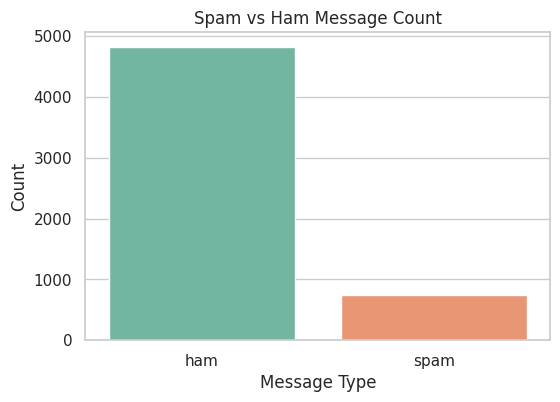

In [9]:
# 1. Bar chart: Count of spam vs ham
plt.figure(figsize=(6, 4))
sns.countplot(data=spam_df, x='label', palette='Set2')
plt.title('Spam vs Ham Message Count')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# Histogram KDE

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

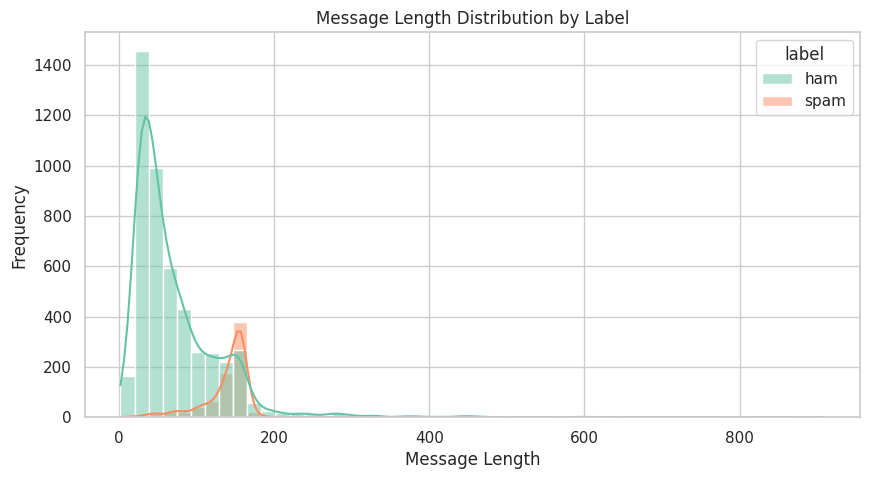

In [10]:
# 2. Message length distribution kernal denisty estimation to compare length of spam msg with ham mdsg 
spam_df['message_length'] = spam_df['message'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(data=spam_df, x='message_length', hue='label', bins=50, kde=True, palette='Set2')
plt.title('Message Length Distribution by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Word Cloud 

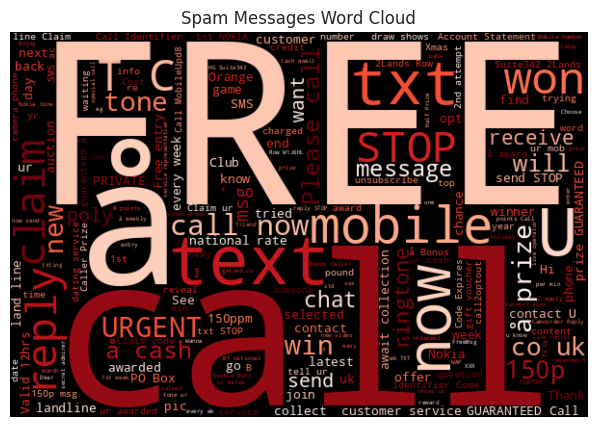

In [11]:
# 3. WordClouds for spam and ham
from wordcloud import WordCloud
spam_words = ' '.join(spam_df[spam_df['label'] == 'spam']['message'])
ham_words = ' '.join(spam_df[spam_df['label'] == 'ham']['message'])

# Spam word cloud
spam_wc = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(spam_words)
plt.figure(figsize=(8, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Spam Messages Word Cloud")
plt.show()

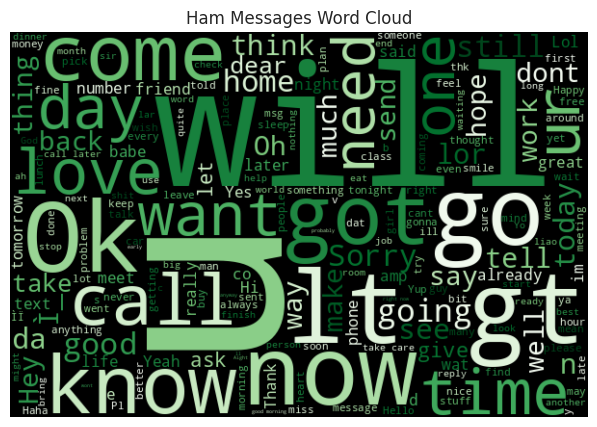

In [12]:
# Ham word cloud
ham_wc = WordCloud(width=600, height=400, background_color='black', colormap='Greens').generate(ham_words)
plt.figure(figsize=(8, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Ham Messages Word Cloud")
plt.show()

In [13]:
def remove_duplicate_words(text):
    """Remove duplicate words from a text while preserving the order.
    The duplicate check is case-insensitive."""
    words = text.split()
    seen = set()
    new_words = []
    for word in words:
        lower_word = word.lower()
        if lower_word not in seen:
            seen.add(lower_word)
            new_words.append(word)
    return ' '.join(new_words)

# Pre-Processing

In [14]:
def preprocess_text_preserve_names(text):
    # Process with spaCy to identify named entities
    ##A spaCy model is a pre-trained NLP pipeline.performs tasks like NER, POS tagging, lemmatization, and parsing
    ##It’s extremely useful for understanding raw text programmatically.
    #NER ==== > PERSON ORG GPE DATE, MONEY, TIME, PRODUCT
    # Extract named entities
    #1 named_entities = [ent.text for ent in doc.ents]
    #named_entities = {ent.text for ent in doc.ents if ent.label_ == "PERSON"}
    #2 KEEP_ENTITIES = {"PERSON","ORG","GPE"}  # Define set of entities to preserve
    #3 KEEP_ENTITIES = set()  # No entities will be preserved
    doc = nlp(text)
    KEEP_ENTITIES = {"GPE"}  #countries, cities, states
    named_entities = {ent.text for ent in doc.ents if ent.label_ in KEEP_ENTITIES}
    
    # 1. Remove punctuations 
    text_no_punct = re.sub(r'[' + string.punctuation + ']', ' ', text)
    
    #no_duplicate_words = remove_duplicate_words(text_no_punct)

    # 2. Tokenization
    tokens = word_tokenize(text_no_punct)

    #  Process tokens - preserve case for named entities, lowercase others
    #3-Case folding
    processed_tokens = []
    for token in tokens:
        is_entity = any(token in entity for entity in named_entities)
        if is_entity:
            processed_tokens.append(token)

        else:
            processed_tokens.append(token.lower())

    # 4. Stop words removal
    stop_words = set(stopwords.words('english'))
    tokens_no_stop = [token for token in processed_tokens if token.lower() not in stop_words]

    # 5. Stemming (only for non-named entities)
    stemmer = PorterStemmer()
    stemmed_tokens = []
    for token in tokens_no_stop:
        is_entity = any(token in entity for entity in named_entities)
        if is_entity:
            stemmed_tokens.append(token)
        else:
            stemmed_tokens.append(stemmer.stem(token))

#Step 6: Lemmatization 
    spacy_doc = nlp(" ".join(tokens_no_stop))  
    lemmatized_tokens = [
        token.text if token.text in named_entities else token.lemma_
        for token in spacy_doc
    ]

    #return lemmatized_tokens 

# 7. Lemmatization with POS

    pos_tags = nltk.pos_tag(lemmatized_tokens)

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []

    for token, pos in pos_tags:
        is_entity = any(token in entity for entity in named_entities)
        if is_entity:
            lemmatized_tokens.append(token)
        else:
            # Convert NLTK POS tags to WordNet POS tags
            if pos.startswith('J'):
                wordnet_pos = 'a'  # adjective
            elif pos.startswith('V'):
                 wordnet_pos = 'v'  # verb
            elif pos.startswith('N'):
                wordnet_pos = 'n'  # noun
            elif pos.startswith('R'):
                wordnet_pos = 'r'  # adverb
            else:
                wordnet_pos = 'n'  # default to noun

            lemmatized_tokens.append(lemmatizer.lemmatize(token, pos=wordnet_pos))

    return lemmatized_tokens 





# # 7. Lemmatization (only for non-named entities)
#     lemmatizer = WordNetLemmatizer()
#     lemmatized_tokens = []
#     for token in stemmed_tokens:
#         is_entity = any(token in entity for entity in named_entities)
#         if is_entity:
#             lemmatized_tokens.append(token)
#         else:
#             lemmatized_tokens.append(lemmatizer.lemmatize(token))

#     return lemmatized_tokens



# Apply pre-processing techniques on dataset

In [15]:
# Apply preprocessing to the entire dataset
print("Applying preprocessing to the entire dataset...")
spam_df['processed_text'] = spam_df['message'].apply(preprocess_text_preserve_names)
print("Preprocessing complete!")

Applying preprocessing to the entire dataset...
Preprocessing complete!


In [16]:
# Display the first few rows of the processed dataset
print("\
Processed Dataset (First 7 rows):")
print(spam_df[['label', 'message', 'processed_text']].head(7))


Processed Dataset (First 7 rows):
  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   
5  spam  FreeMsg Hey there darling it's been 3 week's n...   
6   ham  Even my brother is not like to speak with me. ...   

                                      processed_text  
0  [go, jurong, point, crazy, available, bugis, n...  
1                       [ok, lar, joke, wif, u, oni]  
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...  
3      [u, dun, say, early, hor, u, c, already, say]  
4        [nah, think, go, usf, live, around, though]  
5  [freemsg, hey, darling, 3, week, word, back, l...  
6  [even, brother, like, speak, treat, like, aid,...  


In [17]:
# Assuming your pre-processed data is in a DataFrame named df
output_path = "processed_data.xlsx"  # Change the filename if needed

# Save to Excel
spam_df.to_excel(output_path, index=False)

print(f"Processed data saved to {output_path}")

Processed data saved to processed_data.xlsx


# Token ====> String

In [18]:
# Convert tokens back to strings for TF-Ispam_df
#needs full documents in string format
spam_df['processed_string'] = spam_df['processed_text'].apply(lambda x: ' '.join(x))

print("Preprocessed data (first 5 rows):")
print(spam_df[['label', 'processed_string']].head())

Preprocessed data (first 5 rows):
  label                                   processed_string
0   ham  go jurong point crazy available bugis n great ...
1   ham                              ok lar joke wif u oni
2  spam  free entry 2 wkly comp win fa cup final tkts 2...
3   ham                u dun say early hor u c already say
4   ham                nah think go usf live around though


# Feature generation && Extraction

In [19]:
#term frequency inverse document frequency 
#TF= #times for apear word i in mail j / # all words on mail j
#IDF=log(#total number of mails / #mails contain the word)
#TF *IDF 
#Highlights Important Words{frequent words } --- Reduces Noise from Common Words{ is , and get low values } 
#Simple and Fast easy computational 
## cons : ignore sentiment and meaning 




# TF-IDF 

In [20]:
# Step 1: Apply TF-IDF on preprocessed text
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(spam_df['processed_string'])

# Get feature names for inspection
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a TF-IDF DataFrame for the first 5 rows
tfidf_df = pd.DataFrame(X_tfidf[:5].toarray(), columns=feature_names)

print("\
TF-IDF on preprocessed text (first 5 rows, first 10 features):")
print(tfidf_df.iloc[:, :10])

TF-IDF on preprocessed text (first 5 rows, first 10 features):
    00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

   0125698789   02  
0         0.0  0.0  
1         0.0  0.0  
2         0.0  0.0  
3         0.0  0.0  
4         0.0  0.0  


# Generate spam key-words feature

In [21]:
# Step 2: Generate a feature for 'Presence of spam-related keywords' on preprocessed tokens
spam_keywords = ['free', 'win', 'prize', 'comp', 'text', 'money', 'offer', 'urgent', 'credit', 'click']

def contains_spam_keywords(tokens, keywords=spam_keywords):
    # Check if any token is in the spam keywords list
    return int(any(token in keywords for token in tokens))

# Apply the function to create a new feature column
spam_df['has_spam_keywords'] = spam_df['processed_text'].apply(contains_spam_keywords)

print("\
Spam Keyword Feature on preprocessed text (first 5 rows):")
print(spam_df[['processed_string', 'has_spam_keywords']].head())

# Get some statistics on the spam keyword feature
spam_count = spam_df[spam_df['label'] == 'spam'].shape[0]
spam_with_keywords = spam_df[(spam_df['label'] == 'spam') & (spam_df['has_spam_keywords'] == 1)].shape[0]

ham_count = spam_df[spam_df['label'] == 'ham'].shape[0]
ham_with_keywords = spam_df[(spam_df['label'] == 'ham') & (spam_df['has_spam_keywords'] == 1)].shape[0]

print("\
Spam messages with keywords: {}/{} ({:.2f}%)".format(
    spam_with_keywords, spam_count, 100 * spam_with_keywords / spam_count))
print("Ham messages with keywords: {}/{} ({:.2f}%)".format(
    ham_with_keywords, ham_count, 100 * ham_with_keywords / ham_count))

print("\
Feature Generation & Extraction on preprocessed data complete!")

Spam Keyword Feature on preprocessed text (first 5 rows):
                                    processed_string  has_spam_keywords
0  go jurong point crazy available bugis n great ...                  0
1                              ok lar joke wif u oni                  0
2  free entry 2 wkly comp win fa cup final tkts 2...                  1
3                u dun say early hor u c already say                  0
4                nah think go usf live around though                  0
Spam messages with keywords: 414/747 (55.42%)
Ham messages with keywords: 218/4825 (4.52%)
Feature Generation & Extraction on preprocessed data complete!


# Train-Test Split

In [22]:
# Prepare features and labels
X = X_tfidf  
# Encode labels: spam = 1, ham = 0
spam_df['label_encoded'] = spam_df['label'].apply(lambda x: 1 if x == 'spam' else 0)
y = spam_df['label_encoded']
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the data into training and testing sets
# X = spam_df['processed_text']
# y = spam_df['label']
#y=spam_df['has_spam_keywords']
# # Convert labels to binary (0 for ham, 1 for spam)
# y = y.map({'ham': 0, 'spam': 1})


# Models Build

In [23]:
 #Create a dictionary to store models and their names
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Models Evalution

In [24]:
# Dictionary to store results
results = {}

# Iterate over each model, train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    results[name] = {
        'Accuracy': acc,
        'F1-score': f1,
        'Precision': prec,
        'Recall': rec
    }
    print('Model: ' + name)
    print('Accuracy: ' + str(acc))
    print('F1-score: ' + str(f1))
    print('Precision: ' + str(prec))
    print('Recall: ' + str(rec))
    print('------------------------------------')

print('Model evaluation complete.')

Model: Logistic Regression
Accuracy: 0.9587443946188341
F1-score: 0.8188976377952757
Precision: 0.9904761904761905
Recall: 0.697986577181208
------------------------------------
Model: Naive Bayes
Accuracy: 0.9659192825112107
F1-score: 0.8538461538461538
Precision: 1.0
Recall: 0.7449664429530202
------------------------------------
Model: SVM
Accuracy: 0.9811659192825112
F1-score: 0.9241877256317689
Precision: 1.0
Recall: 0.8590604026845637
------------------------------------
Model: Gradient Boosting
Accuracy: 0.968609865470852
F1-score: 0.8689138576779026
Precision: 0.9830508474576272
Recall: 0.7785234899328859
------------------------------------
Model evaluation complete.


In [25]:
#  display results 
results_df = pd.DataFrame(results).T
print('\
Evaluation Results DataFrame (metrics for each model):')
print(results_df.head())

Evaluation Results DataFrame (metrics for each model):
                     Accuracy  F1-score  Precision    Recall
Logistic Regression  0.958744  0.818898   0.990476  0.697987
Naive Bayes          0.965919  0.853846   1.000000  0.744966
SVM                  0.981166  0.924188   1.000000  0.859060
Gradient Boosting    0.968610  0.868914   0.983051  0.778523


In [26]:
#precision :when the model predicts a positive class, it's usually right false positives are costly ==> classify ham as spam tp /p (predict p )
#recall : model is good at identifying all actual positive instances false negatives are costly ==> where the model classifies a spam email as not spam = tp/tp+fn(actual p)


# Visualize the results

Model Performance Comparison:


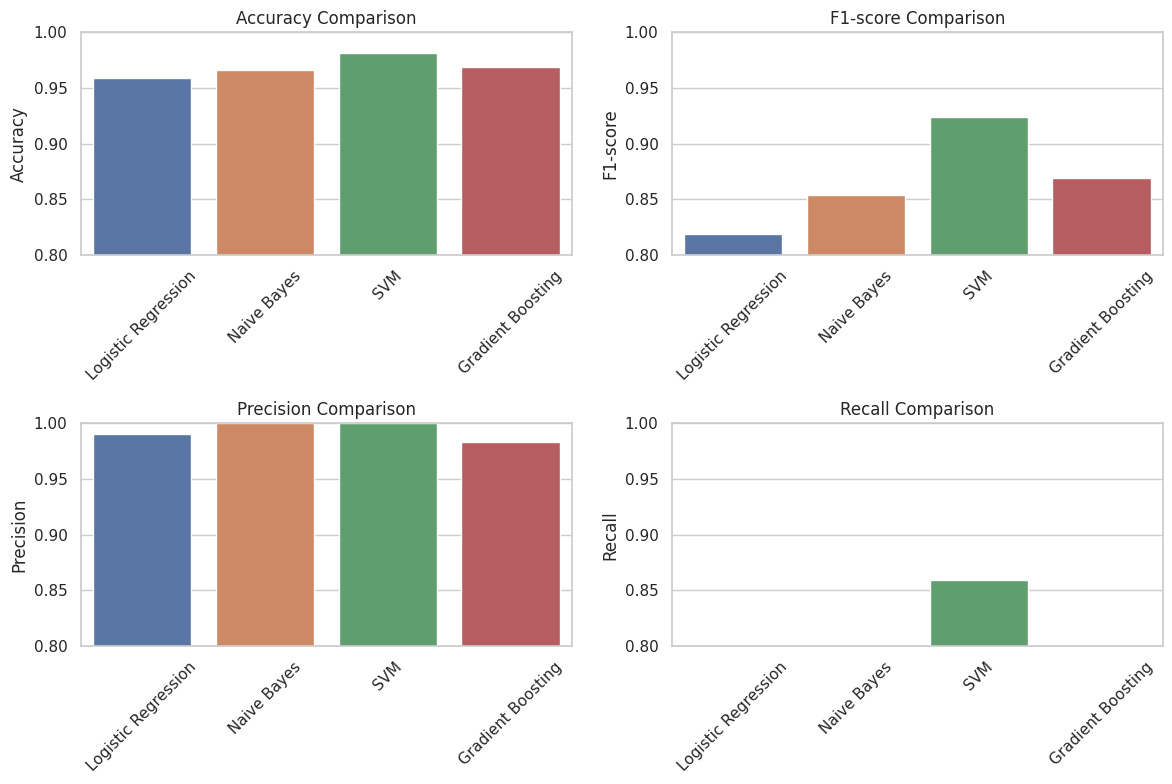

Best model based on F1 score: SVM
F1 score: 0.9242


In [27]:


# Create a DataFrame for results
results_df = pd.DataFrame(results).T
print("\
Model Performance Comparison:")
#print(results_df)
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'F1-score', 'Precision', 'Recall']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(f'{metric.capitalize()} Comparison')
    plt.xticks(rotation=45)
    plt.ylim(0.8, 1.0)  # Adjust as needed

plt.tight_layout()
plt.savefig('model_performance.png')
plt.show()

# Find the best model based on F1 score
best_model_name = results_df['F1-score'].idxmax()
best_model = models[best_model_name]
print(f"\
Best model based on F1 score: {best_model_name}")
print(f"F1 score: {results_df.loc[best_model_name,'F1-score']:.4f}")

# confusion matrix

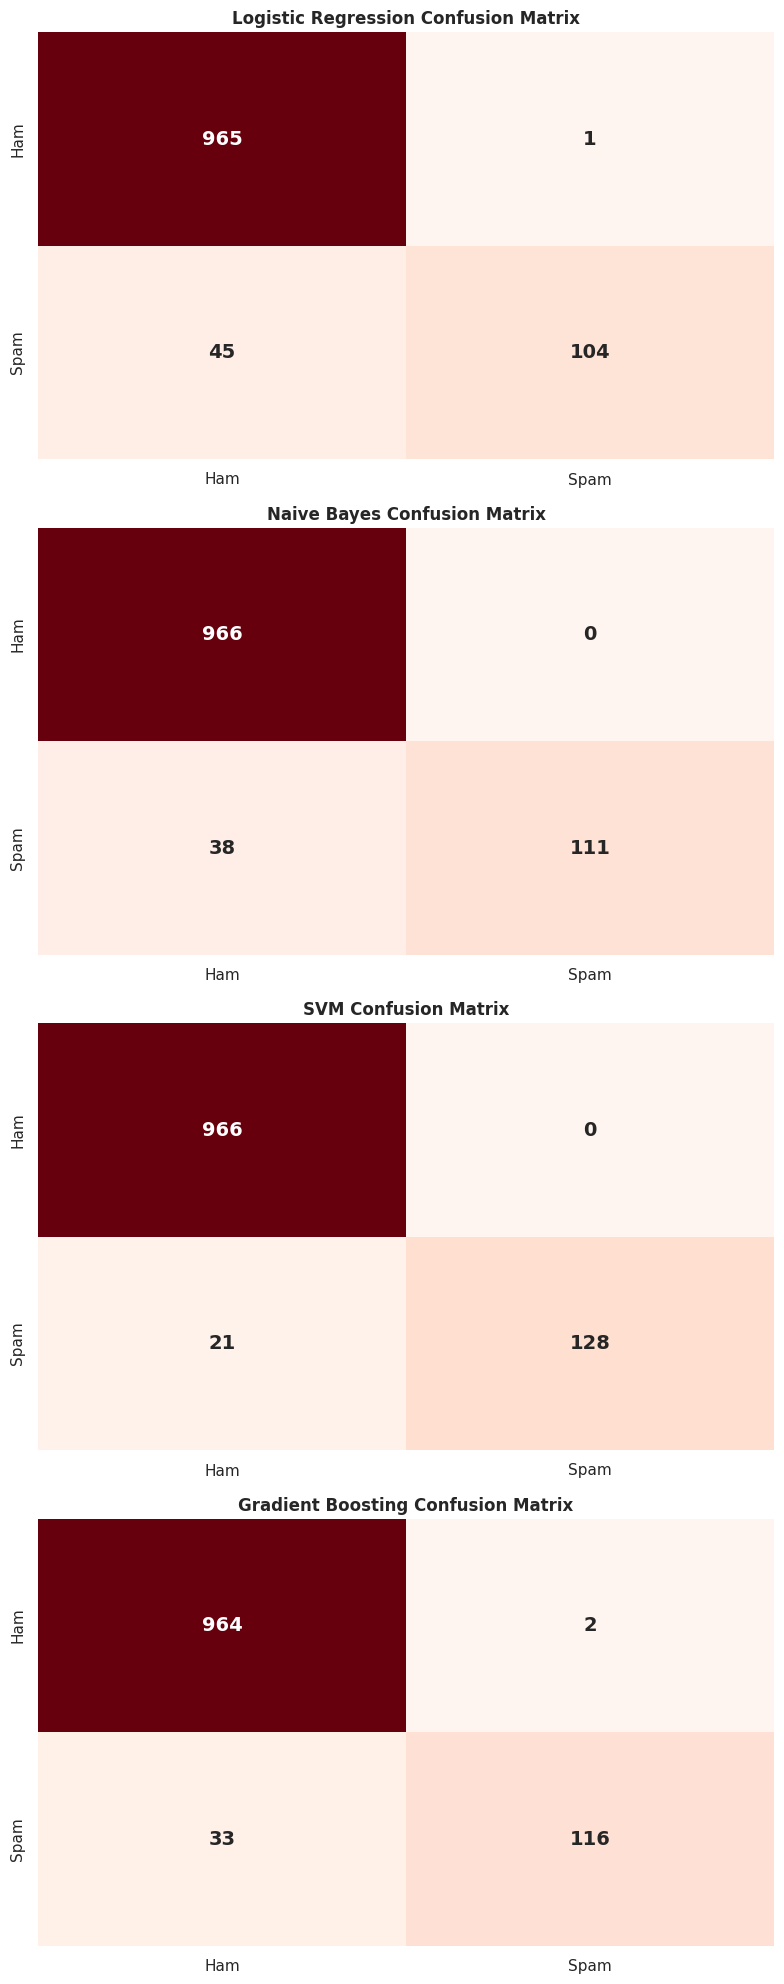

In [28]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import math

# Create a figure for the confusion matrices
plt.figure(figsize=(8, 20))

# Loop through each model to create confusion matrices
for i, (name, model) in enumerate(models.items(), 1):
    # Get predictions
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create subplot
    plt.subplot(4, 1, i)
    # Plot confusion matrix using seaborn heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False, xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], ax=plt.gca(), annot_kws={"size": 14, "weight": "bold"})


    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
    # disp.plot(cmap='Purples',values_format='d',ax=plt.gca() )

    plt.title(f'{name} Confusion Matrix',fontsize=12 , fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrices.png',dpi=300)
plt.show()

# try to use spam key-words to split data and evalute models 

# Train-Test split

In [29]:
# Prepare features and labels
X = X = spam_df[['has_spam_keywords']]  
# Encode labels: spam = 1, ham = 0
spam_df['label_encoded'] = spam_df['label'].apply(lambda x: 1 if x == 'spam' else 0)
y = spam_df['label_encoded']
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the data into training and testing sets
# X = spam_df['processed_text']
# y = spam_df['label']
#y=spam_df['has_spam_keywords']
# # Convert labels to binary (0 for ham, 1 for spam)
# y = y.map({'ham': 0, 'spam': 1})


# Models Build

In [30]:
#Create a dictionary to store models and their names
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Models Evalution

In [31]:
# Dictionary to store results
results = {}

# Iterate over each model, train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    results[name] = {
        'Accuracy': acc,
        'F1-score': f1,
        'Precision': prec,
        'Recall': rec
    }
    print('Model: ' + name)
    print('Accuracy: ' + str(acc))
    print('F1-score: ' + str(f1))
    print('Precision: ' + str(prec))
    print('Recall: ' + str(rec))
    print('------------------------------------')

print('Model evaluation complete.')

Model: Logistic Regression
Accuracy: 0.9201793721973094
F1-score: 0.6691449814126395
Precision: 0.75
Recall: 0.6040268456375839
------------------------------------
Model: Naive Bayes
Accuracy: 0.8663677130044843
F1-score: 0.0
Precision: 0.0
Recall: 0.0
------------------------------------
Model: SVM
Accuracy: 0.9201793721973094
F1-score: 0.6691449814126395
Precision: 0.75
Recall: 0.6040268456375839
------------------------------------
Model: Gradient Boosting
Accuracy: 0.9201793721973094
F1-score: 0.6691449814126395
Precision: 0.75
Recall: 0.6040268456375839
------------------------------------
Model evaluation complete.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualize the results

Model Performance Comparison:


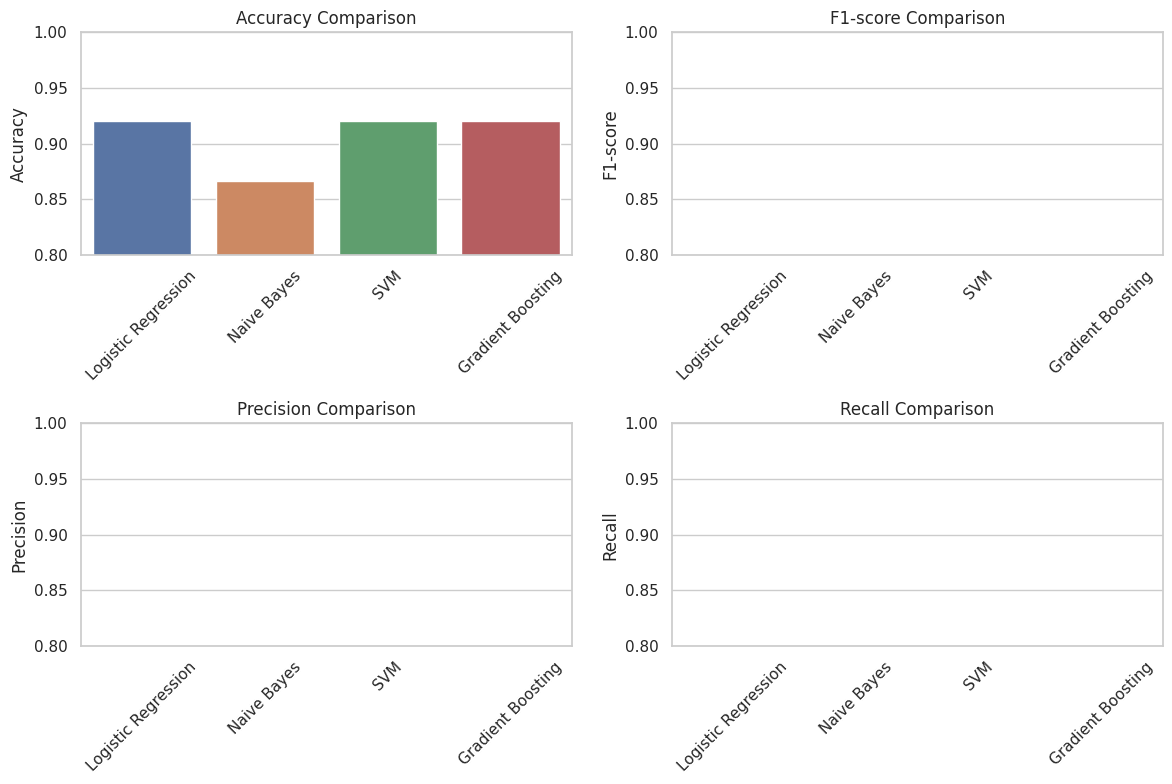

Best model based on F1 score: Logistic Regression
F1 score: 0.6691


In [32]:


# Create a DataFrame for results
results_df = pd.DataFrame(results).T
print("\
Model Performance Comparison:")
#print(results_df)
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'F1-score', 'Precision', 'Recall']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(f'{metric.capitalize()} Comparison')
    plt.xticks(rotation=45)
    plt.ylim(0.8, 1.0)  # Adjust as needed

plt.tight_layout()
plt.savefig('model_performance.png')
plt.show()

# Find the best model based on F1 score
best_model_name = results_df['F1-score'].idxmax()
best_model = models[best_model_name]
print(f"\
Best model based on F1 score: {best_model_name}")
print(f"F1 score: {results_df.loc[best_model_name,'F1-score']:.4f}")

# CONFUSION MATRIX

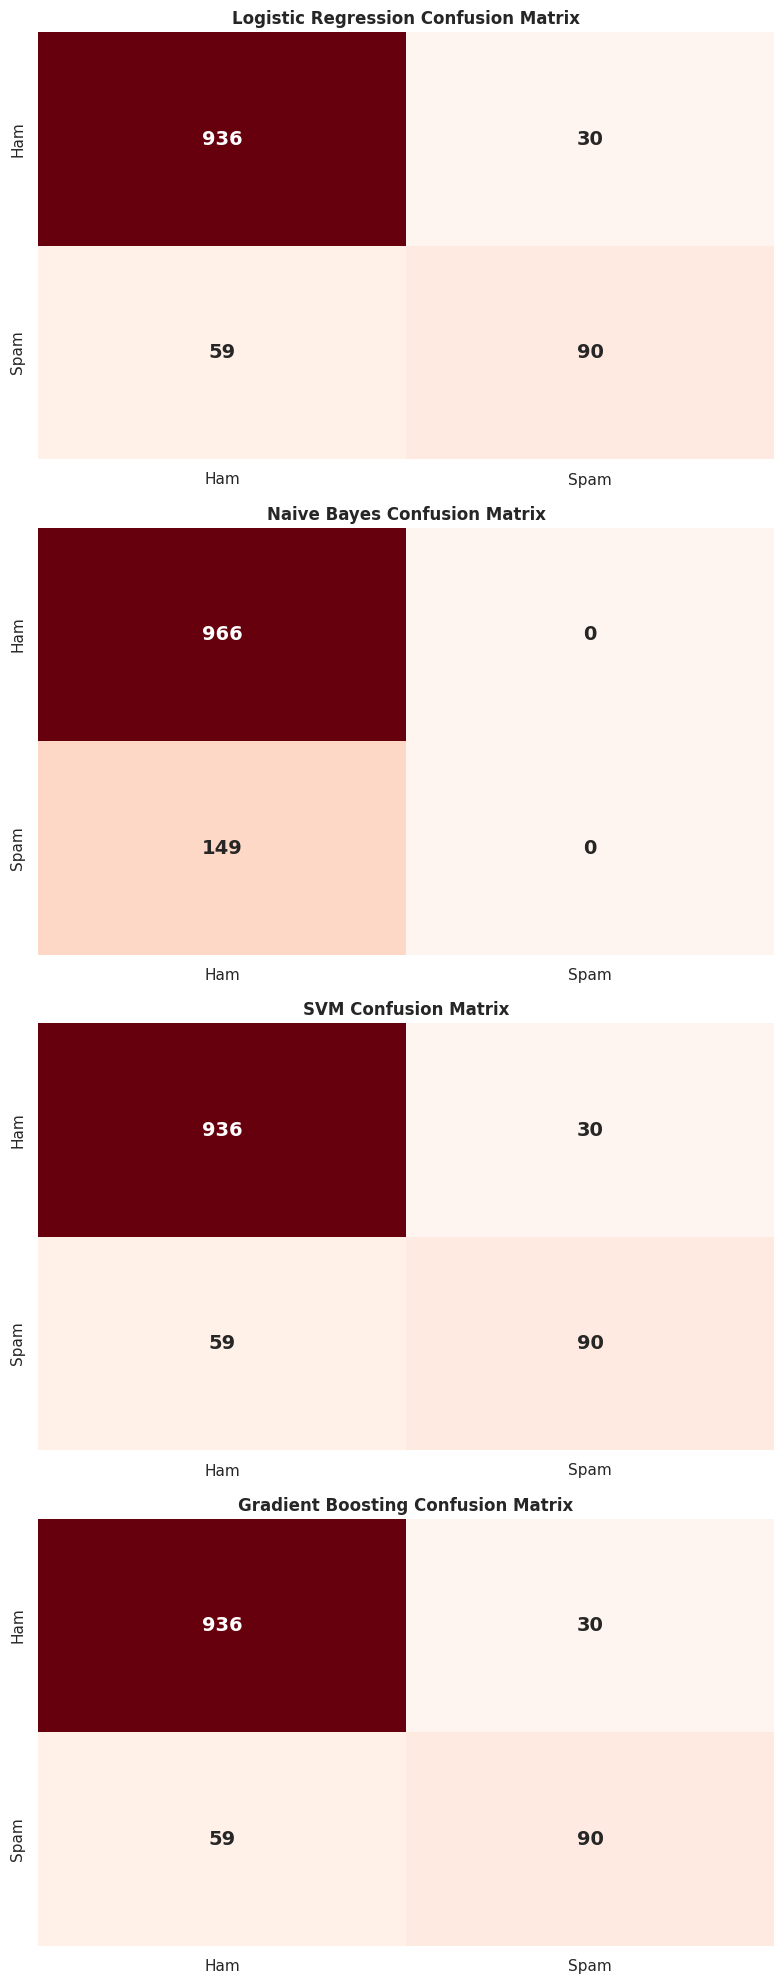

In [33]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import math

# Create a figure for the confusion matrices
plt.figure(figsize=(8, 20))

# Loop through each model to create confusion matrices
for i, (name, model) in enumerate(models.items(), 1):
    # Get predictions
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create subplot
    plt.subplot(4, 1, i)
    # Plot confusion matrix using seaborn heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False, xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], ax=plt.gca(), annot_kws={"size": 14, "weight": "bold"})


    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
    # disp.plot(cmap='Purples',values_format='d',ax=plt.gca() )

    plt.title(f'{name} Confusion Matrix',fontsize=12 , fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrices.png',dpi=300)
plt.show()